<a href="https://colab.research.google.com/github/ShauryaK0303/TASK-1-SPAM-CLASSIFICATION/blob/main/Lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**AIM**
Implement the SVD algorithm and analyze it.

#**INTRODUCTION**
Singular Value Decomposition (SVD) is a matrix factorization technique widely used in recommender systems to uncover latent relationships between users and items. By reducing a user-item interaction matrix into lower-dimensional components, SVD helps handle sparse datasets efficiently and improves prediction accuracy.

#**THEORY**
SVD decomposes a matrix A into three matrices.
This decomposition identifies latent factors, enabling the prediction of missing values and personalized recommendations.In recommender systems, SVD helps predict missing values by approximating the original matrix with a reduced rank.

$$A = U \Sigma V^T$$

#**BLOCK REPRESENTATION**
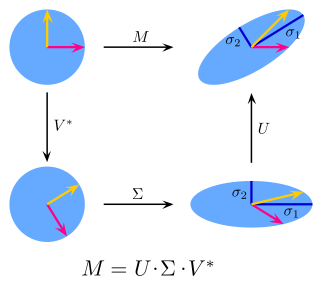

In [ ]:
# @title CODE
from google.colab import drive
import pandas as pd
import numpy as np
from scipy.sparse.linalg import svds

In [ ]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
ratings = pd.read_csv("ratings.csv")
movies = pd.read_csv("movies.csv")

In [ ]:
n_users = ratings.userId.unique().shape[0]
n_movies = ratings.movieId.unique().shape[0]
print('Number of users = ' + str(n_users) + ' | Number of movies = ' + str(n_movies))

Number of users = 610 | Number of movies = 9724


In [ ]:
raw_ratings_pivot = ratings.pivot(index = 'userId', columns ='movieId', values = 'rating')

In [ ]:
ratings_pivot = raw_ratings_pivot.copy().fillna(0)

In [ ]:
user_ratings_mean = np.mean(ratings_pivot.values, axis=1)
user_ratings_demeaned = ratings_pivot.values - user_ratings_mean.reshape(-1, 1)

In [ ]:
U, sigma, Vt = svds(user_ratings_demeaned, k=50)

In [ ]:
sigma = np.diag(sigma)

In [ ]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(-1, 1)

In [ ]:
preds = pd.DataFrame(all_user_predicted_ratings, columns = ratings_pivot.columns)
preds.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
0,2.167328,0.402751,0.840184,-0.076281,-0.551337,2.504091,-0.890114,-0.026443,0.196974,1.593259,...,-0.023453,-0.019967,-0.026939,-0.026939,-0.023453,-0.026939,-0.023453,-0.023453,-0.023453,-0.058732
1,0.211459,0.006658,0.033455,0.017419,0.183430,-0.062473,0.083037,0.024158,0.049330,-0.152530,...,0.019498,0.016777,0.022219,0.022219,0.019498,0.022219,0.019498,0.019498,0.019498,0.032281
2,0.003588,0.030518,0.046393,0.008176,-0.006247,0.107328,-0.012416,0.003779,0.007297,-0.059362,...,0.005909,0.006209,0.005610,0.005610,0.005909,0.005610,0.005909,0.005909,0.005909,0.008004
3,2.051549,-0.387104,-0.252199,0.087562,0.130465,0.270210,0.477835,0.040313,0.025858,-0.017365,...,0.004836,0.004172,0.005500,0.005500,0.004836,0.005500,0.004836,0.004836,0.004836,-0.023311
4,1.344738,0.778511,0.065749,0.111744,0.273144,0.584426,0.254930,0.128788,-0.085541,1.023455,...,-0.008042,-0.007419,-0.008664,-0.008664,-0.008042,-0.008664,-0.008042,-0.008042,-0.008042,-0.010127


In [ ]:
preds.to_csv("/content/drive/My Drive/college/svd_preds.csv", index=False)

In [ ]:
def recommend_movies(predictions, userID, movies, original_ratings, num_recommendations):

    user_row_number = userID - 1
    sorted_user_predictions = preds.iloc[user_row_number].sort_values(ascending=False)

    user_data = original_ratings[original_ratings.userId == (userID)]
    user_full = (user_data.merge(movies, how = 'left', left_on = 'movieId', right_on = 'movieId').
                     sort_values(['rating'], ascending=False)
                 )

    print ('User {0} has already rated {1} movies.'.format(userID, user_full.shape[0]))
    print ('Recommending highest {0} predicted ratings movies not already rated.'.format(num_recommendations))

    recommendations = (movies[~movies['movieId'].isin(user_full['movieId'])].
         merge(pd.DataFrame(sorted_user_predictions).reset_index(), how = 'left',
               left_on = 'movieId',
               right_on = 'movieId').
         rename(columns = {user_row_number: 'Predictions'}).
         sort_values('Predictions', ascending = False).
                       iloc[:num_recommendations, :-1]
                      )

    return user_full, recommendations

In [ ]:
already_rated, predictions = recommend_movies(preds, 100, movies, ratings, 20)

User 100 has already rated 148 movies.
Recommending highest 20 predicted ratings movies not already rated.


In [ ]:
predictions.head()

,movieId,title,genres
1202,1704,Good Will Hunting (1997),Drama|Romance
895,1259,Stand by Me (1986),Adventure|Drama
409,500,Mrs. Doubtfire (1993),Comedy|Drama
358,440,Dave (1993),Comedy|Romance
1185,1682,"Truman Show, The (1998)",Comedy|Drama|Sci-Fi


In [ ]:
already_rated.head()

,userId,movieId,rating,timestamp,title,genres
86,100,1958,5.0,1100186258,Terms of Endearment (1983),Comedy|Drama
101,100,2423,5.0,1100186118,Christmas Vacation (National Lampoon's Christm...,Comedy
137,100,5620,5.0,1100186982,Sweet Home Alabama (2002),Comedy|Romance
55,100,1101,5.0,1100184137,Top Gun (1986),Action|Romance
125,100,4041,5.0,1100184235,"Officer and a Gentleman, An (1982)",Drama|Romance


#**ANALYSIS & CONCLUSION**
Singular Value Decomposition (SVD) is highly effective in handling sparse
datasets, which are common in recommender systems. By reducing the dimensionality of the user-item interaction matrix, SVD uncovers latent features that drive user preferences and item similarities. This results in improved prediction accuracy and computational efficiency. However, SVD may struggle with scalability for very large datasets without proper optimization.

SVD is a robust and reliable algorithm for recommendation tasks. It balances simplicity and efficiency, making it a popular choice for reducing noise in data and uncovering meaningful relationships in sparse matrices.